# Exercício de Laboratório: Regressão Linear com a Equação Normal

**Objetivo:** aplicar o método da Equação Normal para encontrar os parâmetros ótimos de um modelo de Regressão Linear e, em seguida, verificar os resultados usando a biblioteca Scikit-Learn.

Você irá:
1.  Gerar dados sintéticos com uma tendência linear decrescente.
2.  Usar a Equação Normal e o NumPy para encontrar os melhores parâmetros para o seu modelo de Regressão Linear.
3.  Fazer previsões e plotar a reta de regressão.
4.  Verificar seus resultados usando a classe `LinearRegression` do Scikit-Learn.

### Passo 1: Importar Bibliotecas

A célula de código abaixo importa todas as bibliotecas que usaremos neste exercício: `NumPy` para cálculos numéricos, `Matplotlib` para plotagem e `Scikit-Learn` para o modelo de Regressão Linear.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Passo 2: Gerar Dados Sintéticos

No livro, os dados foram gerados com a equação `y = 4 + 3x + ruído`. Para este exercício, vamos usar uma equação diferente para criar dados com uma correlação negativa (uma reta decrescente). Além disso, os valores do atributo vão de 2 até 6.

**Sua Tarefa:** Complete a célula de código a seguir para gerar 100 pontos de dados usando a equação **`y = 5 - 2x + ruído Gaussiano`**.

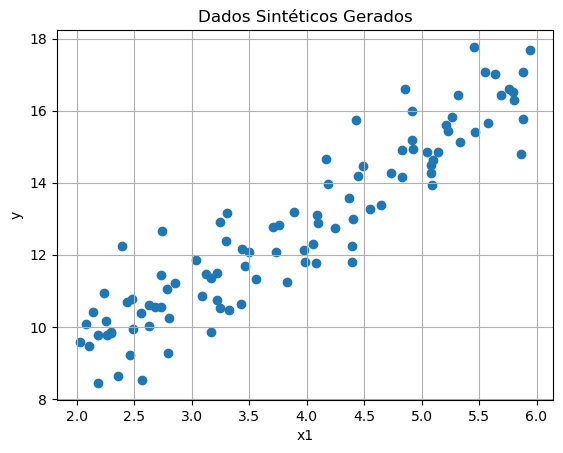

In [2]:
# Para garantir que seja possível reproduzir os resultados
np.random.seed(42)

# Gere 100 instâncias
m = 100

# X=mınimo+(maximo−mınimo)∗rand
X = 2 + 4 * np.random.rand(m, 1)  # column vector
y = 5 + 2 * X + np.random.randn(m, 1)  # column vector


# Vamos plotar os dados para visualizá-los
plt.scatter(X, y)
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Dados Sintéticos Gerados")
plt.grid(True)
plt.show()

### Passo 3: Encontrar Parâmetros com a Equação Normal

Agora, você irá calcular os parâmetros ótimos ($\hat{\theta}$) para o seu modelo. Conforme visto na aula, para encontrar o valor de $\theta$ que minimiza a função de custo, existe uma solução de forma fechada conhecida como a Equação Normal:

$$\hat{\theta} = (X^T X)^{-1} X^T y$$

**Sua Tarefa:**
1.  Adicione o termo de viés ($x_0 = 1$) a cada instância no seu conjunto de dados `X`. Isso é necessário para que a Equação Normal calcule o intercepto ($\theta_0$).
2.  Implemente a Equação Normal usando as operações de álgebra linear do NumPy para encontrar `theta_best`.

In [3]:
from sklearn.preprocessing import add_dummy_feature

# 1. Adicione o termo de viés (x0 = 1) a X. Crie uma nova variável X_b.
#adiciona uma coluna de 1s no início da matriz X, ou seja, o termo de viés (x₀ = 1).
X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
# 2. Calcule theta_best usando a Equação Normal
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y


# Exiba os parâmetros encontrados
print("Parâmetros encontrados com a Equação Normal:")
print(f"Theta 0 (Intercepto): {theta_best[0][0]}")
print(f"Theta 1 (Coeficiente): {theta_best[1][0]}")

# Esperamos que theta_0 seja próximo de 5 e theta_1 seja próximo de -2.

Parâmetros encontrados com a Equação Normal:
Theta 0 (Intercepto): 5.4449827711083145
Theta 1 (Coeficiente): 1.8850566932192332


### Passo 4: Fazer Previsões e Plotar a Reta de Regressão

Com os parâmetros em `theta_best`, seu modelo está treinado! Agora você pode usá-lo para fazer previsões em novos dados.

**Sua Tarefa:**
1.  Crie um novo conjunto de dados `X_new` para prever os valores de y quando x=2 e x=6.
2.  Adicione o termo de viés a `X_new`.
3.  Calcule as previsões `y_predict` usando `theta_best`.
4.  Plote a reta de regressão resultante sobre os dados originais para visualizar o ajuste do modelo.

Previsões para X_new:
[[ 9.21509616]
 [16.75532293]]


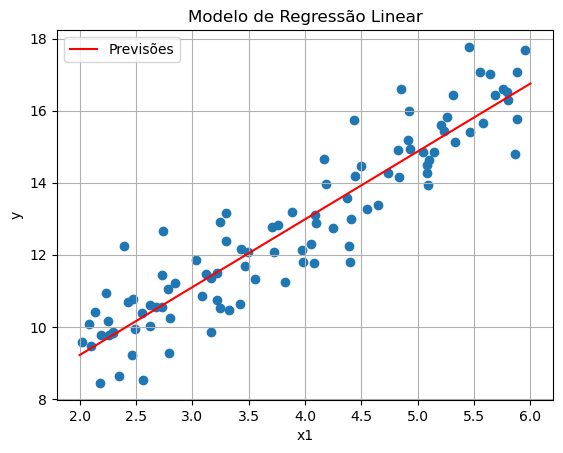

In [4]:
# ############################################################### #
# PREENCHA O CÓDIGO AQUI:
# 1. Crie X_new para fazer previsões
# Depois de treinar o modelo, queremos usar a reta para prever novos valores de y.
# Escolher x = 2 e x = 6 é só um exemplo para ver como o modelo se comporta em pontos específicos.
X_new = np.array([[2], [6]])

# 2. Adicione o termo de viés a X_new para criar X_new_b
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance

# 3. Calcule as previsões
# Aqui usamos a equação: y_predict = X_new · theta_best
# Isso nos dá os valores de y previstos pelo modelo para x = 2 e x = 6.
y_predict = X_new_b @ theta_best


# ############################################################### #

# Exiba as previsões
print("Previsões para X_new:")
print(y_predict)

# Plote a reta de regressão
plt.plot(X_new, y_predict, "r-", label="Previsões")
plt.scatter(X, y)
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Modelo de Regressão Linear")
plt.legend()
plt.grid(True)
plt.show()

### Passo 5: Verificar com Scikit-Learn

Realizar a Regressão Linear usando o Scikit-Learn é muito mais direto. A classe `LinearRegression` lida com o termo de viés automaticamente e usa um método de otimização computacionalmente mais eficiente (SVD) nos bastidores.

**Sua Tarefa:**
1.  Crie e treine uma instância da classe `LinearRegression`.
2.  Imprima o `intercept_` (intercepto) e o `coef_` (coeficiente) do modelo treinado. Os valores devem ser praticamente idênticos aos que você calculou com a Equação Normal.

In [5]:
# 1. Crie o modelo de Regressão Linear
from sklearn.linear_model import LinearRegression

# Cria o modelo de regressão linear (ainda vazio, sem aprender nada).
lin_reg = LinearRegression()

# 2. Treine o modelo
#Aqui o modelo aprende com os dados.
lin_reg.fit(X, y)

# intercept_ → é o termo de viés (b), onde a reta cruza o eixo y.
# coef_ → é o coeficiente angular (m), que mostra o quanto y muda quando x muda.
lin_reg.intercept_, lin_reg.coef_ 


# 3. Faça previsões para X_new
# Essa linha usa o modelo treinado (lin_reg) para fazer previsões.
# X_new contém novos valores de x (ou seja, dados que o modelo ainda não viu).
# O método .predict() calcula os valores de y correspondentes, usando a reta que o modelo aprendeu.

lin_reg.predict(X_new)




# Exiba os parâmetros encontrados pelo Scikit-Learn
print("Parâmetros encontrados com Scikit-Learn:")
print(f"Intercepto: {lin_reg.intercept_[0]}")
print(f"Coeficiente: {lin_reg.coef_[0][0]}")

# Exiba as previsões
print("Previsões para X_new com Scikit-Learn:")
print(y_predict)

Parâmetros encontrados com Scikit-Learn:
Intercepto: 5.4449827711082595
Coeficiente: 1.8850566932192423
Previsões para X_new com Scikit-Learn:
[[ 9.21509616]
 [16.75532293]]


**Conclusão**

Se tudo correu bem, os parâmetros que você calculou manualmente usando a Equação Normal devem corresponder exatamente aos parâmetros encontrados pela biblioteca Scikit-Learn.
Isso demonstra como o Scikit-Learn simplifica o processo (e torna-o mais eficiente pelo uso da pseudo-inversa), mas entender a matemática subjacente, como a Equação Normal, é fundamental para fazer boas escolher no projeto de sistemas de aprendizado de máquina.